# data preparation


In [114]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [165]:

df=pd.read_csv("deep2.csv",header=0,infer_datetime_format=True,parse_dates=['occurtime'],index_col=['occurtime'])


In [116]:
df.head()

,power
occurtime,
2020-12-28 00:05:00,0.00
2020-12-28 00:10:00,99.20
2020-12-28 00:15:00,95.68
2020-12-28 00:20:00,93.20
2020-12-28 00:25:00,91.92


In [117]:
df.tail()

,power
occurtime,
2021-01-13 23:40:00,90.40
2021-01-13 23:45:00,91.36
2021-01-13 23:50:00,90.72
2021-01-13 23:55:00,91.28
2021-01-14 00:00:00,90.80


In [118]:
df.index

DatetimeIndex(['2020-12-28 00:05:00', '2020-12-28 00:10:00',
               '2020-12-28 00:15:00', '2020-12-28 00:20:00',
               '2020-12-28 00:25:00', '2020-12-28 00:30:00',
               '2020-12-28 00:35:00', '2020-12-28 00:40:00',
               '2020-12-28 00:45:00', '2020-12-28 00:50:00',
               ...
               '2021-01-13 23:15:00', '2021-01-13 23:20:00',
               '2021-01-13 23:25:00', '2021-01-13 23:30:00',
               '2021-01-13 23:35:00', '2021-01-13 23:40:00',
               '2021-01-13 23:45:00', '2021-01-13 23:50:00',
               '2021-01-13 23:55:00', '2021-01-14 00:00:00'],
              dtype='datetime64[ns]', name='occurtime', length=4612, freq=None)

In [78]:
#df['occurtime'] = pd.to_datetime(df['occurtime'],format="%Y-%m-%d_%H:%M:%S")


In [79]:
#df.to_csv('deep.csv',index=False,date_format="%Y-%m-%d %H:%M:%S")


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4612 entries, 2020-12-28 00:05:00 to 2021-01-14 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   4612 non-null   float64
dtypes: float64(1)
memory usage: 72.1 KB


In [166]:
#resample time to days
daily_data=df.resample('D').sum()

In [121]:
#df['occurtime'] = pd.to_datetime(df['occurtime'],format="%Y-%m-%d_%H:%M:%S")



daily_data.to_csv('dailydeep.csv',index=False,date_format="%Y-%m-%d ")


In [167]:
daily_data.head()

,power
occurtime,
2020-12-28,20913.60
2020-12-29,20184.48
2020-12-30,24927.60
2020-12-31,20394.39
2021-01-01,20161.92


In [123]:
daily_data.describe()

,power
count,18.000000
mean,20342.972778
std,5894.155953
min,90.800000
25%,20236.957500
50%,21201.720000
75%,23361.440000
max,26016.080000


In [124]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2020-12-28 to 2021-01-14
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   18 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes


## Step 2: Visualize the Data

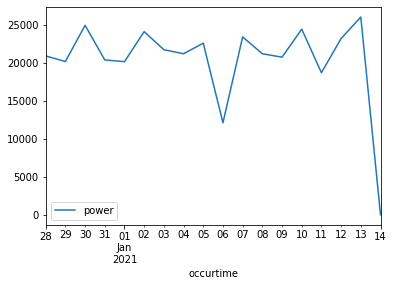

In [168]:
daily_data.plot()

## Remove outliers

In [169]:
# calculate summary statistics
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
data_mean, data_std = mean(daily_data['power']), std(daily_data['power'])
print(data_mean,data_std)

20342.972777777773 5728.089970733703


In [170]:
# identify outliers
#std = 1
cut_off = data_std * 1
lower, upper = data_mean - cut_off, data_mean + cut_off
print(lower,upper)
# number of outliers and their vals outliers
outliers = [x for x in daily_data['power'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
print(outliers)

14614.88280704407 26071.062748511475
Identified outliers: 2
[12147.120000000004, 90.8]


In [128]:
# number of readings left that are non outliers
outliers_removed = [x for x in daily_data['power'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
print(outliers_removed)

Non-outlier observations: 16
[20913.59999999999, 20184.48000000001, 24927.59999999999, 20394.389999999992, 20161.920000000006, 24102.479999999978, 21732.16000000001, 21201.84, 22588.4, 23415.839999999997, 21201.59999999999, 20751.440000000006, 24429.27999999998, 18716.240000000005, 23198.239999999983, 26016.080000000024]


In [171]:
#removing the outliers
#daily_data_filtered
#one std
#59 records left
daily_data_filtered=daily_data[(daily_data.power>=lower)&(daily_data.power<=upper)]
daily_data_filtered.shape
#print(daily_data_filtered)

(16, 1)

In [130]:
#removing the outliers
#daily_data_filtered_1_5 
#1.5 std
#59 records left same as std=1
cut_off = data_std * 1.5
lower_1_5, upper_1_5 = data_mean - cut_off, data_mean + cut_off
daily_data_filtered_1_5=daily_data[(daily_data.power>=lower)&(daily_data.power<=upper)]
daily_data_filtered_1_5.shape
print(lower_1_5,upper_1_5,daily_data_filtered_1_5)

11750.837821677218 28935.10773387833                power
occurtime           
2020-12-28  20913.60
2020-12-29  20184.48
2020-12-30  24927.60
2020-12-31  20394.39
2021-01-01  20161.92
2021-01-02  24102.48
2021-01-03  21732.16
2021-01-04  21201.84
2021-01-05  22588.40
2021-01-07  23415.84
2021-01-08  21201.60
2021-01-09  20751.44
2021-01-10  24429.28
2021-01-11  18716.24
2021-01-12  23198.24
2021-01-13  26016.08


In [131]:
#removing the outliers
#daily_data_filtered_2 
#2 std
#59 records left same as std=1 and std=1.5
cut_off = data_std * 2
lower_2, upper_2 = data_mean - cut_off, data_mean + cut_off
daily_data_filtered_2=daily_data[(daily_data.power>=lower)&(daily_data.power<=upper)]
daily_data_filtered_2.shape
print(lower_2,upper_2,daily_data_filtered_2,len(daily_data_filtered_2))

8886.792836310367 31799.15271924518                power
occurtime           
2020-12-28  20913.60
2020-12-29  20184.48
2020-12-30  24927.60
2020-12-31  20394.39
2021-01-01  20161.92
2021-01-02  24102.48
2021-01-03  21732.16
2021-01-04  21201.84
2021-01-05  22588.40
2021-01-07  23415.84
2021-01-08  21201.60
2021-01-09  20751.44
2021-01-10  24429.28
2021-01-11  18716.24
2021-01-12  23198.24
2021-01-13  26016.08 16


In [132]:
#removing the outliers
#daily_data_filtered_3
#3 std
#59 records left same as std=1 ,1.5 and 2
cut_off = data_std * 3
lower_3, upper_3 = data_mean - cut_off, data_mean + cut_off
daily_data_filtered_3=daily_data[(daily_data.power>=lower)&(daily_data.power<=upper)]
daily_data_filtered_3.shape
print(lower_3,upper_3,daily_data_filtered_3)

3158.7028655766626 37527.242689978884                power
occurtime           
2020-12-28  20913.60
2020-12-29  20184.48
2020-12-30  24927.60
2020-12-31  20394.39
2021-01-01  20161.92
2021-01-02  24102.48
2021-01-03  21732.16
2021-01-04  21201.84
2021-01-05  22588.40
2021-01-07  23415.84
2021-01-08  21201.60
2021-01-09  20751.44
2021-01-10  24429.28
2021-01-11  18716.24
2021-01-12  23198.24
2021-01-13  26016.08


In [133]:
#removing outliers 
# 3 std
#new_df
#70 records left
from scipy import stats
z_scores = stats.zscore(daily_data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = daily_data[filtered_entries]

print(new_df)


               power
occurtime           
2020-12-28  20913.60
2020-12-29  20184.48
2020-12-30  24927.60
2020-12-31  20394.39
2021-01-01  20161.92
2021-01-02  24102.48
2021-01-03  21732.16
2021-01-04  21201.84
2021-01-05  22588.40
2021-01-06  12147.12
2021-01-07  23415.84
2021-01-08  21201.60
2021-01-09  20751.44
2021-01-10  24429.28
2021-01-11  18716.24
2021-01-12  23198.24
2021-01-13  26016.08


### Testing For Stationarity



In [172]:
from statsmodels.tsa.stattools import adfuller
#test_result=adfuller(daily_data['power'])
test_result=adfuller(daily_data_filtered['power'])

In [173]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(readings):
    result=adfuller(readings)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [174]:
#adfuller_test(daily_data['power'])
adfuller_test(daily_data_filtered['power'])

ADF Test Statistic : -2.9601453538452365
p-value : 0.03878769133249848
#Lags Used : 5
Number of Observations Used : 10
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [137]:
#daily_data['power First Difference'] = daily_data['power'] - daily_data['power'].shift(1)
#new_df['power First Difference'] = new_df['power'] - new_df['power'].shift(1)
daily_data_filtered['power First Difference'] = daily_data_filtered['power'] - daily_data_filtered['power'].shift(1)

In [138]:
#daily_data['power'].shift(1)
#new_df['power'].shift(1)
daily_data_filtered['power'].shift(1)

occurtime
2020-12-28         NaN
2020-12-29    20913.60
2020-12-30    20184.48
2020-12-31    24927.60
2021-01-01    20394.39
2021-01-02    20161.92
2021-01-03    24102.48
2021-01-04    21732.16
2021-01-05    21201.84
2021-01-07    22588.40
2021-01-08    23415.84
2021-01-09    21201.60
2021-01-10    20751.44
2021-01-11    24429.28
2021-01-12    18716.24
2021-01-13    23198.24
Name: power, dtype: float64

In [139]:
daily_data.head(14)
#new_df.head(14)

,power
occurtime,
2020-12-28,20913.60
2020-12-29,20184.48
2020-12-30,24927.60
2020-12-31,20394.39
2021-01-01,20161.92
2021-01-02,24102.48
2021-01-03,21732.16
2021-01-04,21201.84
2021-01-05,22588.40


In [140]:
## Again test dickey fuller test
#adfuller_test(daily_data['power First Difference'].dropna())
#adfuller_test(new_df['power First Difference'].dropna())
print('---------------')
adfuller_test(daily_data_filtered['power First Difference'].dropna())

---------------
ADF Test Statistic : -1.805614945417008
p-value : 0.37767761396727456
#Lags Used : 5
Number of Observations Used : 9
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


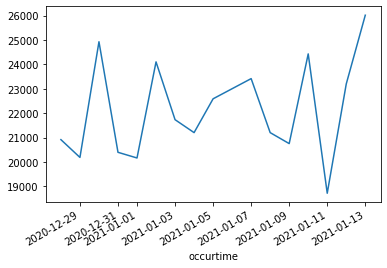

In [175]:
#daily_data['power First Difference']=daily_data['power First Difference'].dropna()
#daily_data['power First Difference'].plot()
#new_df['power First Difference']=new_df['power First Difference'].dropna()
#new_df['power First Difference'].plot()
daily_data_filtered['power'].plot()


arima model

In [32]:
!pip install pmdarima


In [33]:
from pmdarima import auto_arima

In [34]:
import warnings
warnings.filterwarnings('ignore')

1-arima

In [176]:
daily_data_filtered.head()

,power
occurtime,
2020-12-28,20913.60
2020-12-29,20184.48
2020-12-30,24927.60
2020-12-31,20394.39
2021-01-01,20161.92


In [177]:
#stepwise_fit=auto_arima(daily_data['power First Difference'].dropna(),trace=True,supress_warnings=True)
stepwise_fit=auto_arima(daily_data_filtered['power'].dropna(),trace=True,supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=286.295, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=292.305, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=292.317, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=367.671, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=291.508, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=283.139, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=279.766, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=281.020, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=283.083, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.415 seconds


In [145]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -135.883
Date:                Mon, 29 Mar 2021   AIC                            279.766
Time:                        20:26:00   BIC                            282.857
Sample:                             0   HQIC                           279.925
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.596e+04   5202.074     12.679      0.000    5.58e+04    7.62e+04
ar.L1         -1.0592      0.191     -5.536      0.000      -1.434      -0.684
ar.L2         -0.9364      0.106     -8.818      0.000      -1.145      -0.728
sigma2      1.093e+06     19.417   5.63e+04      0.000    1.09e+06    1.09e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.98   Prob(JB):                         0.82
Heteroskedasticity (H):               5.60   Skew:                             0.36
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.78e+20. Standard errors may be unstable.
"""

In [146]:
from statsmodels.tsa.arima_model import ARIMA

In [178]:

n_train=daily_data_filtered.iloc[:11]
n_test=daily_data_filtered.iloc[11:]
print(n_train.shape,n_test.shape)

(11, 1) (5, 1)


In [208]:
print(n_train)

               power
occurtime           
2020-12-28  20913.60
2020-12-29  20184.48
2020-12-30  24927.60
2020-12-31  20394.39
2021-01-01  20161.92
2021-01-02  24102.48
2021-01-03  21732.16
2021-01-04  21201.84
2021-01-05  22588.40
2021-01-07  23415.84
2021-01-08  21201.60


In [179]:

daily_data_filtered.head()


,power
occurtime,
2020-12-28,20913.60
2020-12-29,20184.48
2020-12-30,24927.60
2020-12-31,20394.39
2021-01-01,20161.92


In [180]:
n_test.head()

,power
occurtime,
2021-01-09,20751.44
2021-01-10,24429.28
2021-01-11,18716.24
2021-01-12,23198.24
2021-01-13,26016.08


In [181]:
n_model=ARIMA(n_train['power'],order=(2,0,0))
n_model=n_model.fit()
n_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  power   No. Observations:                   11
Model:                     ARMA(2, 0)   Log Likelihood                 -90.008
Method:                       css-mle   S.D. of innovations            766.656
Date:                Mon, 29 Mar 2021   AIC                            188.017
Time:                        21:24:26   BIC                            189.608
Sample:                             0   HQIC                           187.014
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.201e+04     97.936    224.764      0.000    2.18e+04    2.22e+04
ar.L1.power    -0.7568      0.162     -4.668      0.000      -1.075      -0.439
ar.L2.power    -0.8439      0.128     -6.575      0.000      -1.095      -0.592
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4484           -0.9919j            1.0886           -0.3176
AR.2           -0.4484           +0.9919j            1.0886            0.3176
-----------------------------------------------------------------------------
"""

               power
occurtime           
2021-01-09  20751.44
2021-01-10  24429.28
2021-01-11  18716.24
2021-01-12  23198.24
2021-01-13  26016.08


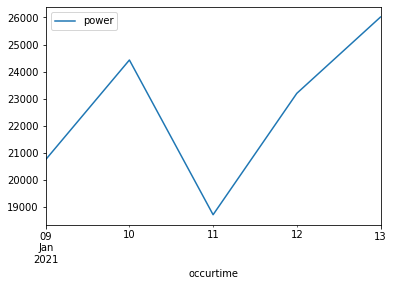

In [182]:
n_test['power'].plot(legend=True)
print(n_test)

11    21441.929048
12    23128.661192
13    21649.317185
14    21345.446600
15    22823.847606
dtype: float64


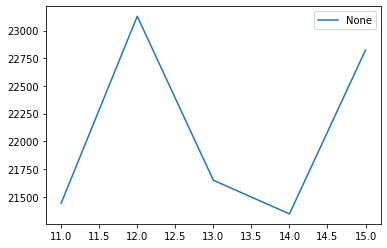

In [187]:
n_start=len(n_train)
n_end=len(n_train)+len(n_test)-1
n_pred=n_model.predict(start=n_start,end=n_end,typ='levels')
print(n_pred)
n_pred.plot(legend=True,x='occurtime')

#predd=abs(pred)
#print(predd)

In [270]:
### whyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy
n_pred.plot(figsize=(12,5),legend=True)
n_test['power'].plot(figsize=(12,5),legend=True)

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8a114d2950> (for post_execute):


ValueError: ignored

ValueError: ignored

In [190]:
daily_data_filtered.head()



,power
occurtime,
2020-12-28,20913.60
2020-12-29,20184.48
2020-12-30,24927.60
2020-12-31,20394.39
2021-01-01,20161.92


In [191]:
daily_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2020-12-28 to 2021-01-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   16 non-null     float64
dtypes: float64(1)
memory usage: 256.0 bytes


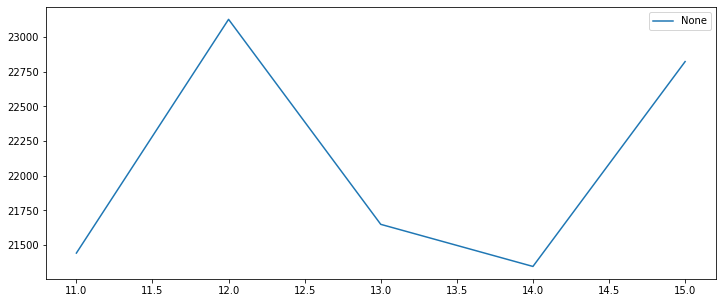

In [192]:
n_pred.plot(figsize=(12,5),legend=True)


In [271]:
n_test['power'].mean()

22622.256

In [272]:
from sklearn.metrics import mean_squared_error
from math import sqrt
n_rmse=sqrt(mean_squared_error(n_pred,n_test['power']))
print(n_rmse)

2208.8239959361595


In [273]:

n_model2=ARIMA(new_df['power'],order=(2,0,0))
n_model2=n_model2.fit()
daily_data_filtered.tail()

,power
occurtime,
2021-01-09,20751.44
2021-01-10,24429.28
2021-01-11,18716.24
2021-01-12,23198.24
2021-01-13,26016.08


In [274]:
#index_future_dates=pd.date_range(start='2021-02-18',end='2021-02-28')
#index_future_dates=pd.date_range(start='2021-02-18',end='2021-02-18')
index_future_dates=pd.date_range(start='2021-01-13',end='2021-01-23')
#print(len(index_future_dates))
fn_pred=n_model2.predict(start=len(daily_data_filtered),end=len(daily_data_filtered)+10,typ='levels').rename('arima preds')
fn_pred.index=index_future_dates
print(fn_pred)

2021-01-13    21316.665401
2021-01-14    19216.482337
2021-01-15    21348.662245
2021-01-16    21953.977434
2021-01-17    21251.019695
2021-01-18    21403.834409
2021-01-19    21493.649292
2021-01-20    21424.564698
2021-01-21    21433.052601
2021-01-22    21444.509808
2021-01-23    21438.066984
Freq: D, Name: arima preds, dtype: float64


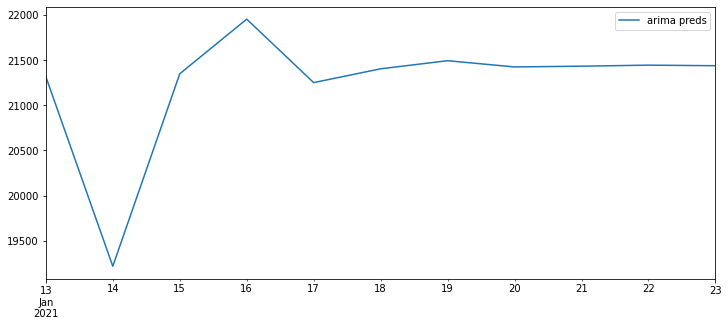

In [275]:
fn_pred.plot(figsize=(12,5),legend=True)

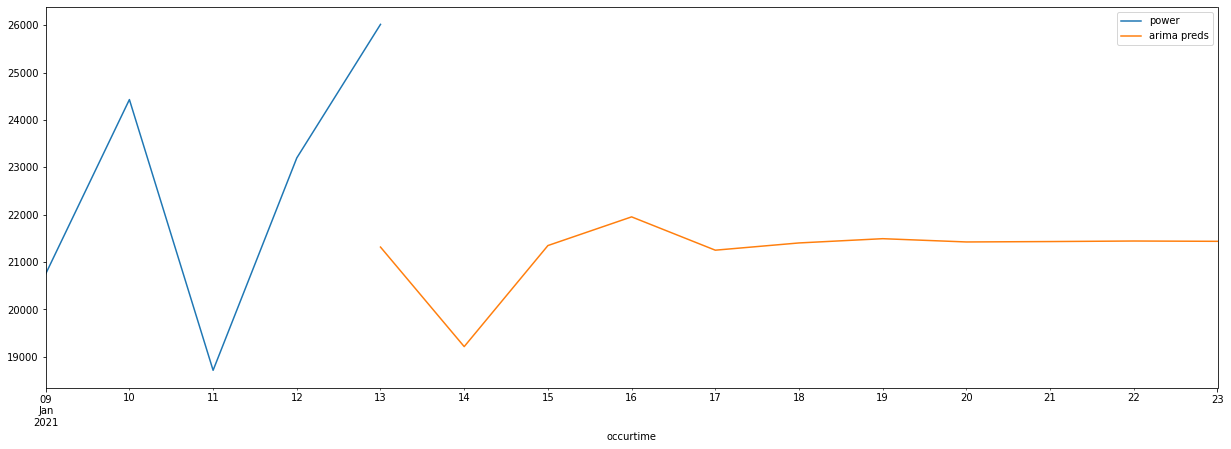

In [276]:
n_test['power'].plot(figsize=(21,7),legend=True)
fn_pred.plot(figsize=(21,7),legend=True)



moving avg

In [277]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(n_train['power'], order=(0,4))
res = mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  power   No. Observations:                   11
Model:                     ARMA(0, 4)   Log Likelihood                 -89.918
Method:                       css-mle   S.D. of innovations            652.082
Date:                Mon, 29 Mar 2021   AIC                            191.836
Time:                        22:19:03   BIC                            194.224
Sample:                             0   HQIC                           190.331
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.201e+04     80.367    273.842      0.000    2.19e+04    2.22e+04
ma.L1.power    -0.9727      0.413     -2.353      0.019      -1.783      -0.163
ma.L2.power          0      0.529          0      1.000      -1.037       1.037
ma.L3.power     0.9727      0.481      2.024      0.043       0.031       1.915
ma.L4.power    -1.0000      0.469     -2.133      0.033      -1.919      -0.081
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2            0.4863           -0.8738j            1.0000           -0.1692
MA.3            0.4863           +0.8738j            1.0000            0.1692
MA.4            1.0000           -0.0000j            1.0000           -0.0000
-----------------------------------------------------------------------------
"""

In [278]:
n_train.tail()

,power
occurtime,
2021-01-03,21732.16
2021-01-04,21201.84
2021-01-05,22588.40
2021-01-07,23415.84
2021-01-08,21201.60


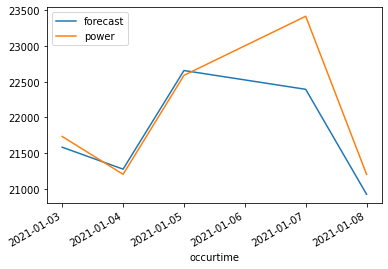

In [279]:
res.plot_predict(start='2021-01-03', end='2021-01-08')
plt.show()

In [230]:
res.aic


191.83625865741965

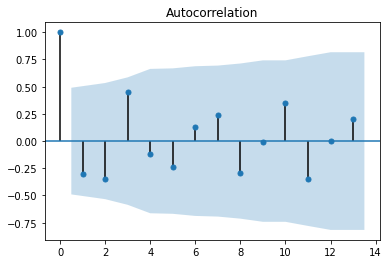

In [234]:
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(daily_data_filtered["power"].dropna())

In [235]:
daily_data_filtered['power'].rolling(window=2).mean()

occurtime
2020-12-28          NaN
2020-12-29    20549.040
2020-12-30    22556.040
2020-12-31    22660.995
2021-01-01    20278.155
2021-01-02    22132.200
2021-01-03    22917.320
2021-01-04    21467.000
2021-01-05    21895.120
2021-01-07    23002.120
2021-01-08    22308.720
2021-01-09    20976.520
2021-01-10    22590.360
2021-01-11    21572.760
2021-01-12    20957.240
2021-01-13    24607.160
Name: power, dtype: float64

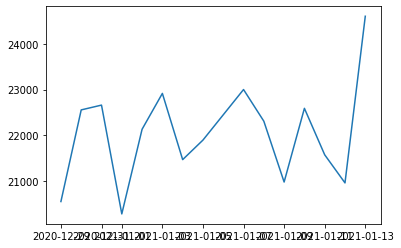

In [236]:
plt.plot(daily_data_filtered['power'].rolling(window=2).mean())

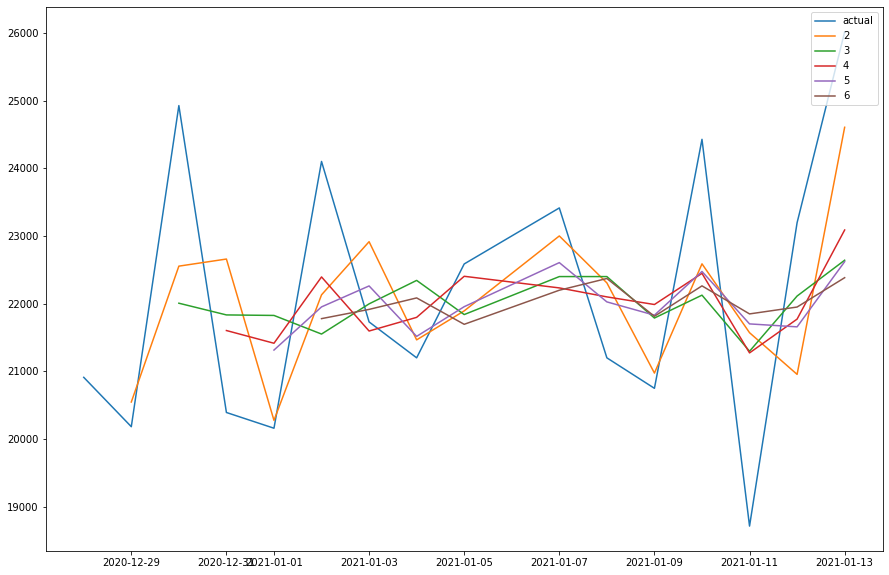

In [237]:
plt.figure(figsize=(15,10))

plt.plot(daily_data_filtered['power'],label='actual')
plt.plot(daily_data_filtered['power'].rolling(window=2).mean(),label='2')
plt.plot(daily_data_filtered['power'].rolling(window=3).mean(),label='3')
plt.plot(daily_data_filtered['power'].rolling(window=4).mean(),label='4')

plt.plot(daily_data_filtered['power'].rolling(window=5).mean(),label='5')

plt.plot(daily_data_filtered['power'].rolling(window=6).mean(),label='6',)
plt.legend(loc=1)


predicted=22008.560000, expected=20394.390000
predicted=21835.490000, expected=20161.920000
predicted=21827.970000, expected=24102.480000
predicted=21552.930000, expected=21732.160000
predicted=21998.853333, expected=21201.840000
predicted=22345.493333, expected=22588.400000
predicted=21840.800000, expected=23415.840000
predicted=22402.026667, expected=21201.600000
predicted=22401.946667, expected=20751.440000
predicted=21789.626667, expected=24429.280000
predicted=22127.440000, expected=18716.240000
predicted=21298.986667, expected=23198.240000
predicted=22114.586667, expected=26016.080000
Test MSE: 4260380.802


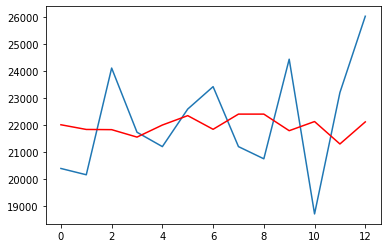

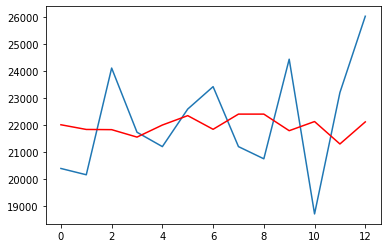

In [280]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
X = daily_data_filtered['power'].dropna()
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:20])
pyplot.plot(predictions[0:20], color='red')
pyplot.show()



moving avg another method

In [281]:
movin_model=ARIMA(n_train['power'],order=(0,0,4))
movin_model=movin_model.fit()
movin_model.summary()
#q=1 ,aic=193.097
#q=4 ,aic=191.836

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  power   No. Observations:                   11
Model:                     ARMA(0, 4)   Log Likelihood                 -89.918
Method:                       css-mle   S.D. of innovations            652.082
Date:                Mon, 29 Mar 2021   AIC                            191.836
Time:                        22:19:46   BIC                            194.224
Sample:                             0   HQIC                           190.331
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.201e+04     80.367    273.842      0.000    2.19e+04    2.22e+04
ma.L1.power    -0.9727      0.413     -2.353      0.019      -1.783      -0.163
ma.L2.power          0      0.529          0      1.000      -1.037       1.037
ma.L3.power     0.9727      0.481      2.024      0.043       0.031       1.915
ma.L4.power    -1.0000      0.469     -2.133      0.033      -1.919      -0.081
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2            0.4863           -0.8738j            1.0000           -0.1692
MA.3            0.4863           +0.8738j            1.0000            0.1692
MA.4            1.0000           -0.0000j            1.0000           -0.0000
-----------------------------------------------------------------------------
"""

               power
occurtime           
2021-01-09  20751.44
2021-01-10  24429.28
2021-01-11  18716.24
2021-01-12  23198.24
2021-01-13  26016.08


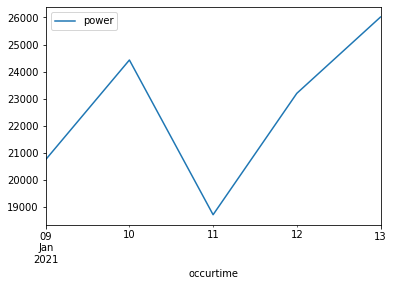

In [282]:
n_test['power'].plot(legend=True)
print(n_test)

11    21742.804666
12    23070.493713
13    21256.475407
14    21728.310812
15    22007.820045
dtype: float64


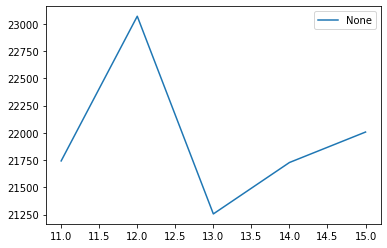

In [283]:
n_start=len(n_train)
n_end=len(n_train)+len(n_test)-1
m_pred=movin_model.predict(start=n_start,end=n_end,typ='levels')
print(m_pred)
m_pred.plot(legend=True,x='occurtime')

#predd=abs(pred)
#print(predd)

In [258]:
### whyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy
#daily_data_filtered.occurtime = pd.to_datetime(daily_data_filtered.occurtime)
m_pred.plot(figsize=(12,5),legend=True)
n_test['power'].plot(figsize=(12,5),legend=True)

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8a114d2950> (for post_execute):


ValueError: ignored

ValueError: ignored

In [259]:
daily_data_filtered.head()



,power
occurtime,
2020-12-28,20913.60
2020-12-29,20184.48
2020-12-30,24927.60
2020-12-31,20394.39
2021-01-01,20161.92


In [260]:
daily_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2020-12-28 to 2021-01-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   16 non-null     float64
dtypes: float64(1)
memory usage: 256.0 bytes


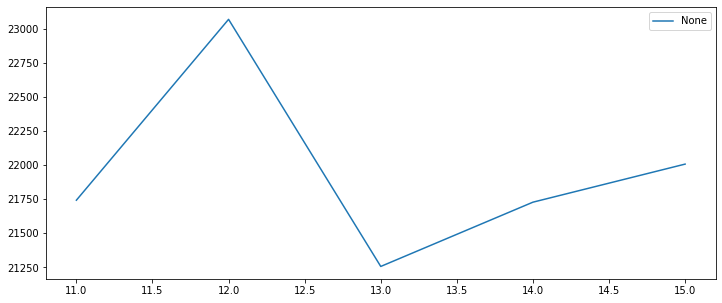

In [261]:
m_pred.plot(figsize=(12,5),legend=True)


In [284]:
n_test['power'].mean()

22622.256

In [285]:
from sklearn.metrics import mean_squared_error
from math import sqrt
m_rmse=sqrt(mean_squared_error(m_pred,n_test['power']))
print(m_rmse)

2345.5805113765273


In [286]:

movin_model2=ARIMA(daily_data_filtered['power'],order=(0,0,4))
movin_model2=movin_model2.fit()
daily_data_filtered.tail()

,power
occurtime,
2021-01-09,20751.44
2021-01-10,24429.28
2021-01-11,18716.24
2021-01-12,23198.24
2021-01-13,26016.08


In [290]:

index_future_dates=pd.date_range(start='2021-01-10',end='2021-01-23')
fnmovin_pred=movin_model2.predict(start=len(daily_data_filtered),end=len(daily_data_filtered)+13,typ='levels').rename('arima preds')
fnmovin_pred.index=index_future_dates
print(fnmovin_pred)

2021-01-10             NaN
2021-01-11             NaN
2021-01-12             NaN
2021-01-13             NaN
2021-01-14    21936.033892
2021-01-15    21936.033892
2021-01-16    21936.033892
2021-01-17    21936.033892
2021-01-18    21936.033892
2021-01-19    21936.033892
2021-01-20    21936.033892
2021-01-21    21936.033892
2021-01-22    21936.033892
2021-01-23    21936.033892
Freq: D, Name: arima preds, dtype: float64


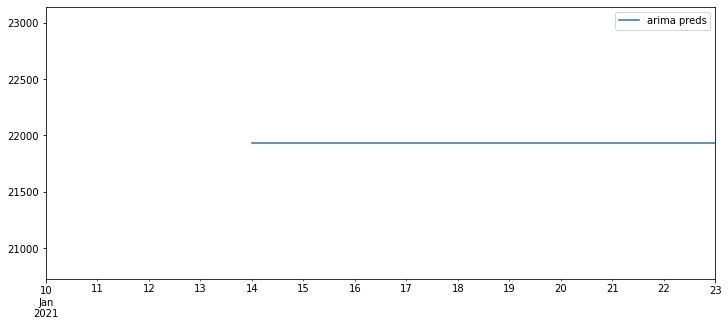

In [291]:
fnmovin_pred.plot(figsize=(12,5),legend=True)

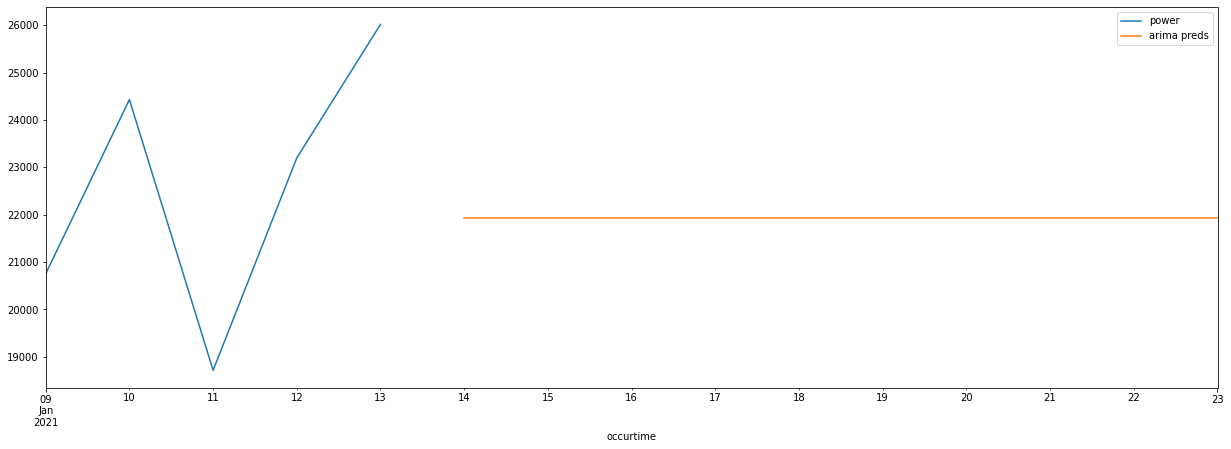

In [292]:
n_test['power'].plot(figsize=(21,7),legend=True)
fnmovin_pred.plot(figsize=(21,7),legend=True)

